<a href="https://colab.research.google.com/github/zhrnnsw/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum Pertemuan 10 - GLOBAL THRESHOLDING**



> Zahra Annisa Wahono
>
> TI-3H / 29
>
> 2141720016

## **Tugas Praktikum**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## **Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170**

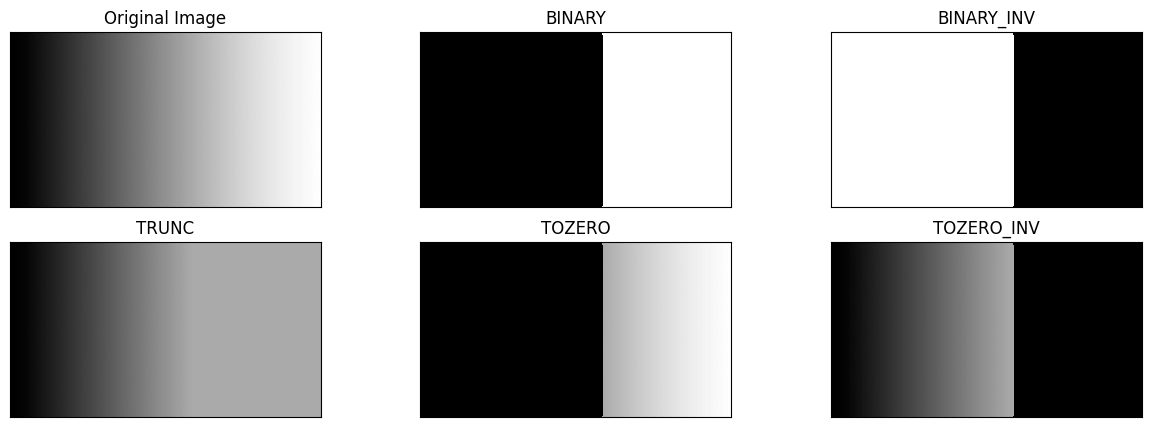

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/Semester 5/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## **Otsu Thresholding tanpa menggunakan Library.**


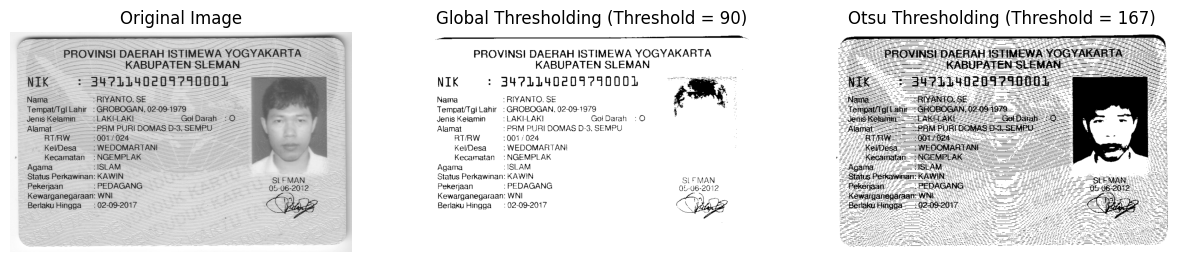

In [ ]:
def otsu_thresholding(image):
    # Menghitung histogram gambar
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    hist_norm = hist.ravel() / hist.max()

    Q = hist_norm.cumsum()

    bins = np.arange(256)

    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255] - Q[i]
        if q1 == 0 or q2 == 0:
            continue

        b1, b2 = np.hsplit(bins, [i])

        # Menghitung varian di setiap threshold
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Menghitung fungsi objektif untuk Otsu
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    return thresh

def global_thresholding(image, threshold):
    ret, global_thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return global_thresh

# Baca gambar
image_path = '/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/ktp.png'
img = cv2.imread(image_path, 0)  # Membaca gambar dalam skala keabuan

# Menentukan nilai threshold untuk global thresholding
global_thresh_value = 90

# Menggunakan Otsu's Thresholding
otsu_threshold = otsu_thresholding(img)
ret, otsu = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Melakukan Global Thresholding
global_img = global_thresholding(img, global_thresh_value)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_img, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Thresholding (Threshold = ' + str(otsu_threshold) + ')')
plt.axis('off')

plt.show()

## **Histogram**

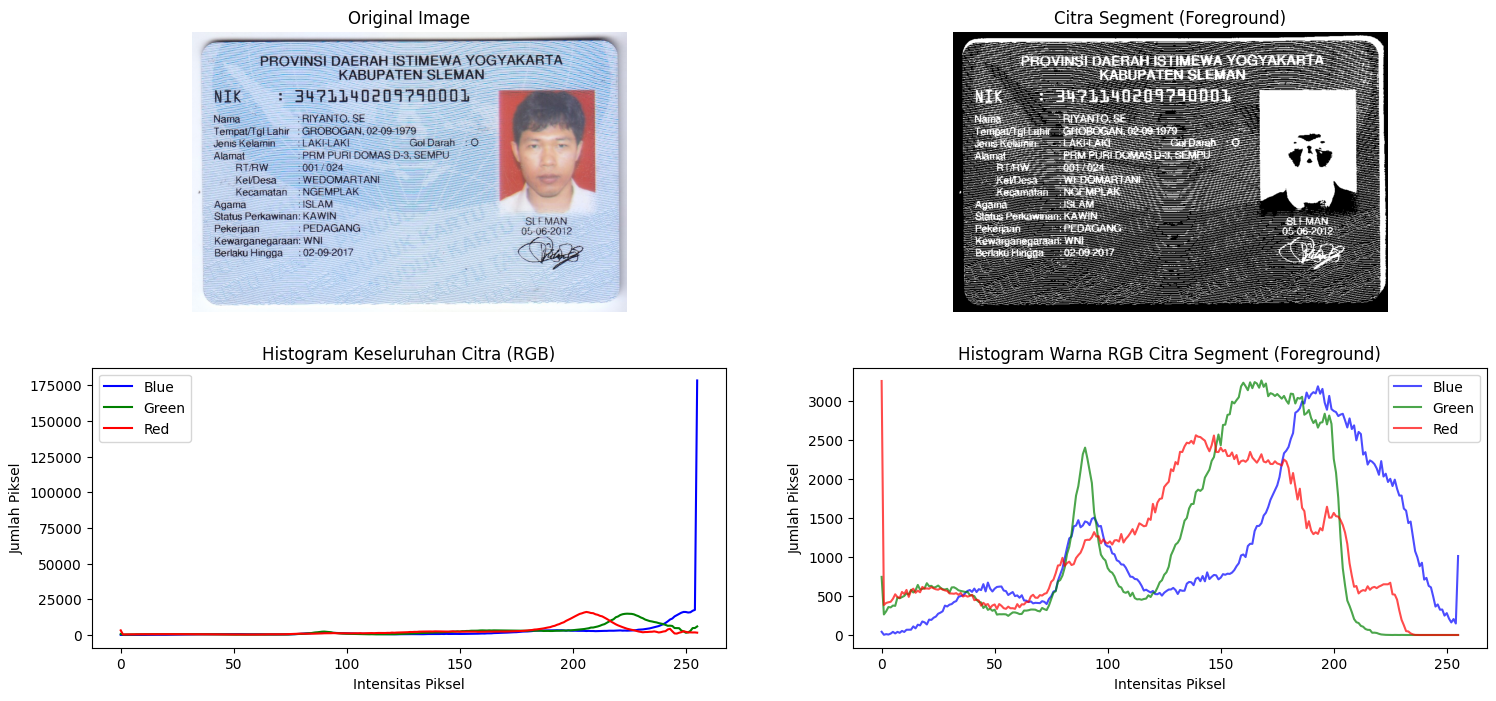

In [6]:
# Baca gambar
image_path = '/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/ktp.png'
img = cv2.imread(image_path)

# Konversi ke citra keabuan
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lakukan segmentasi (contoh: global thresholding)
ret, thresholded = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
foreground = cv2.bitwise_not(thresholded)

# Pisahkan saluran warna (BGR)
b, g, r = cv2.split(img)

# Hitung histogram untuk setiap saluran warna pada citra keseluruhan
hist_full_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram untuk setiap saluran warna pada citra segmentasi
hist_segmented_b = cv2.calcHist([b], [0], foreground, [256], [0, 256])
hist_segmented_g = cv2.calcHist([g], [0], foreground, [256], [0, 256])
hist_segmented_r = cv2.calcHist([r], [0], foreground, [256], [0, 256])

plt.figure(figsize=(18, 8))

# Tampilkan gambar asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Tampilkan citra segment (foreground)
plt.subplot(2, 2, 2)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment (Foreground)')
plt.axis('off')

# Tampilkan histogram untuk keseluruhan citra (RGB)
plt.subplot(2, 2, 3)
plt.plot(hist_full_b, color='blue', label='Blue')
plt.plot(hist_full_g, color='green', label='Green')
plt.plot(hist_full_r, color='red', label='Red')
plt.title('Histogram Keseluruhan Citra (RGB)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Tampilkan histogram warna RGB pada citra segment (foreground)
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_b, color='blue', label='Blue', alpha=0.7)
plt.plot(hist_segmented_g, color='green', label='Green', alpha=0.7)
plt.plot(hist_segmented_r, color='red', label='Red', alpha=0.7)
plt.title('Histogram Warna RGB Citra Segment (Foreground)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

## **Segmentasi Warna Biru**

Segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja.

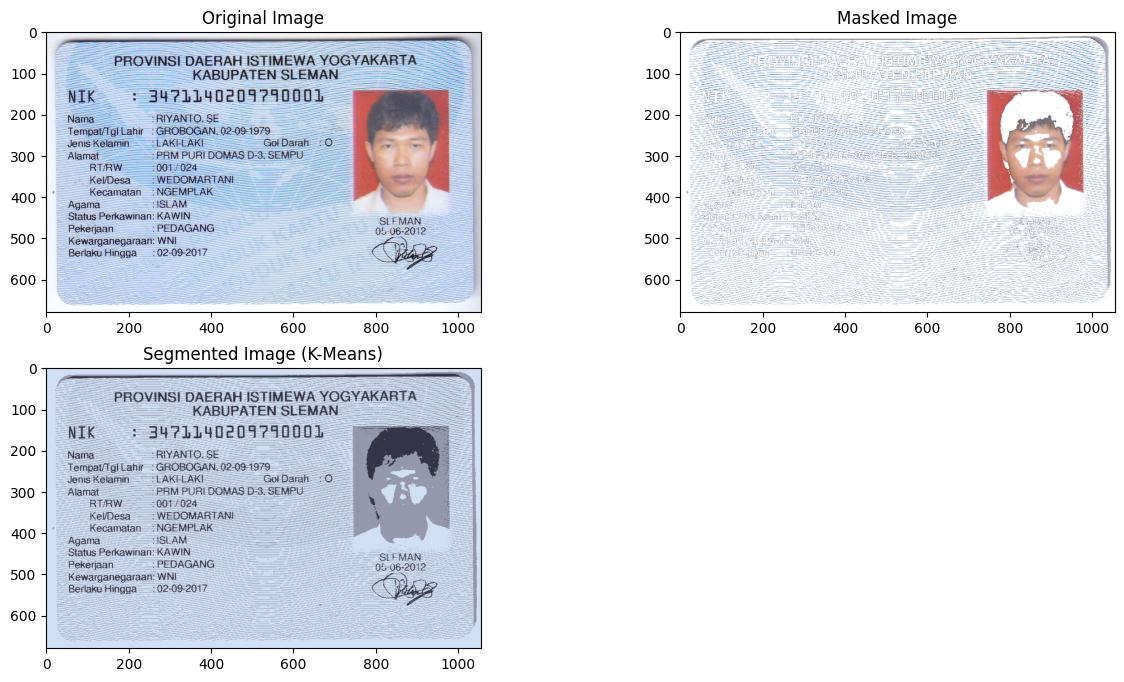

In [15]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2

masked_image[labels == 1] = [255, 255, 255]
masked_image[labels == 2] = [255, 255, 255]

masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

## **Tugas**

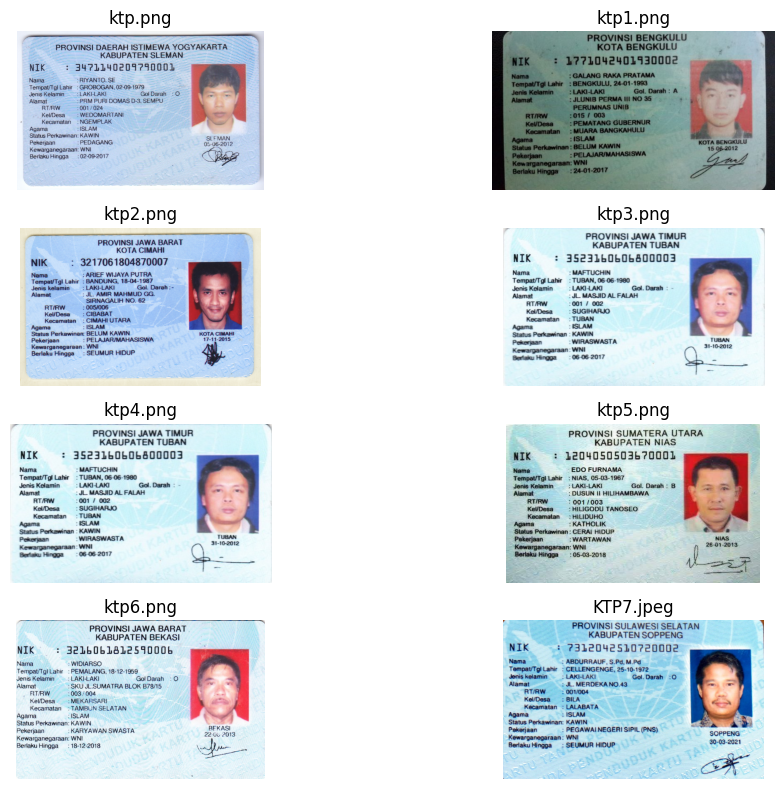

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import random
from sklearn.cluster import KMeans
import math

directory = "/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More"

# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Define the number of columns for display
num_columns = 2
num_rows = (len(image_files) + num_columns - 1) // num_columns

# Create a new figure for displaying the images
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through all the images in the directory
for i, img_file in enumerate(image_files):
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)

    # Tampilkan gambar in subplots
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_file)
    plt.axis('off')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


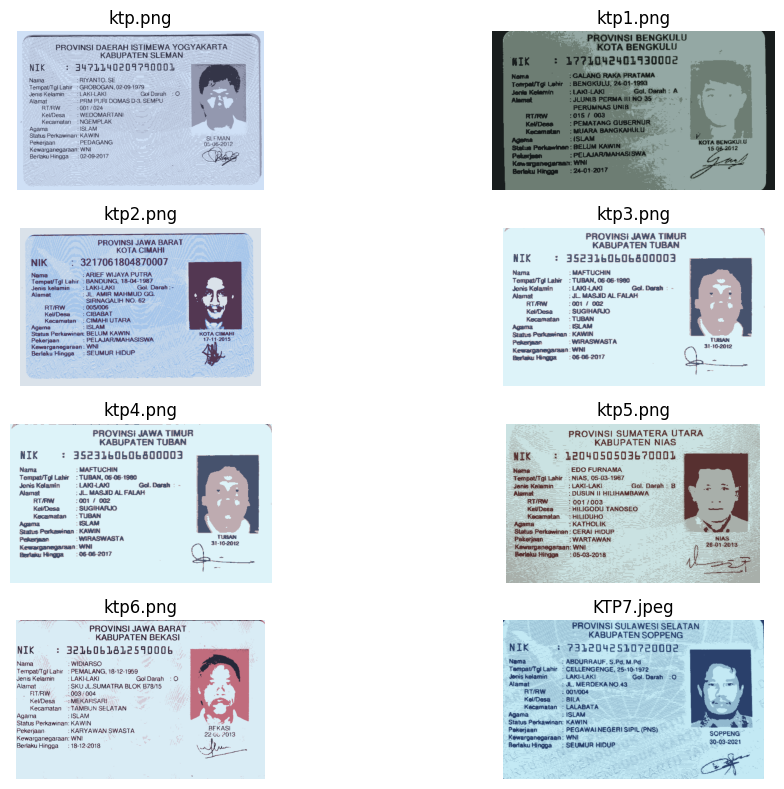

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

directory = "/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More"

# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Inisialisasi gambar gabungan
combined_image = None

# Define the number of columns for display
num_columns = 2
num_rows = (len(image_files) + num_columns - 1) // num_columns

# Create a new figure for displaying the images
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through all the images in the directory
for i, img_file in enumerate(image_files):
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)

    # Flatten the pixel values
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define the criteria and the number of clusters (k)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3  # Number of clusters

    # Apply K-Means clustering
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the centers to integers
    centers = np.uint8(centers)

    # Flatten the labels array
    labels = labels.flatten()

    # Convert the segmented image back to the original shape
    segmented_image = centers[labels].reshape(img.shape)

    # Add the segmented image to the subplot
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(img_file)
    plt.axis('off')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()
